<a href="https://colab.research.google.com/github/BaruaNirzar/Machine-learning-Lab/blob/main/Lab_04_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETE-456 Machine Learning Sessional
#Id: 1608017

Lab-04: **Exploring different types of Regression**

> Objective: 
 1. *To apply various regression algorithms on the real world dataset.*

>Procedure: 
      
 1)    At first PANDAS and NUMPY library is called. Then dataset was downloded. By pd library dataset was read to get the information about data. After that missing values of the set was removed by the mean value of the entries of the columns. Then feature and target set was selected. By selecting test and train sets, fit transform was done for the train set. One hot encoder was used for this. Then different regressor processes were done. Mean value error,Mean squared error and r2 score was checked. After that, fit line was plotted.



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt

#Reference


1.   [SuperDataScience](https://www.superdatascience.com/pages/machine-learning)



##Dataset (Medical Cost Personal Datasets)


Columns

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance


**Task**

Can you accurately predict insurance costs?

In [ ]:
# Download the data
!wget -O insurance.csv https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0

--2021-12-03 05:06:09--  https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mwgqgjbmfw0xa5p/insurance.csv [following]
--2021-12-03 05:06:10--  https://www.dropbox.com/s/raw/mwgqgjbmfw0xa5p/insurance.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9efc2ebb9f0a2604a289abd82f.dl.dropboxusercontent.com/cd/0/inline/BbGmUVqUJtWSTaG1WU3p7pROv8oYrp0IdsvKiVDyeq-DBt1S6U2tS2vtdeMOnTedl7MbTx4d2zRiLHu9HMpjiivkqJvJ9jiEf0il3tHnLjQI3jBrB1UYmZQzq_PWs7_ixIb2btFR9tJZN_UCl0PBenLV/file# [following]
--2021-12-03 05:06:10--  https://uc9efc2ebb9f0a2604a289abd82f.dl.dropboxusercontent.com/cd/0/inline/BbGmUVqUJtWSTaG1WU3p7pROv8oYrp0IdsvKiVDyeq-DBt1S6U2tS2vtdeMOnTedl7MbTx4d2zRiLHu9HM

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
dataset.columns
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean")

In [ ]:
features = dataset[['age']]  
target = dataset[['charges']] 

In [ ]:
features


,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
labelencoder_f = LabelEncoder()
target['charges']= labelencoder_f.fit_transform(target['charges'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1070, 1)
(268, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.svm import SVR 

regressor = SVR(kernel = 'linear')
regressor.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred.shape)

(268,)


In [ ]:
print(y_pred.shape)

(268,)


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

205.782089552239

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

124557.99716417864

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.1654944687664036

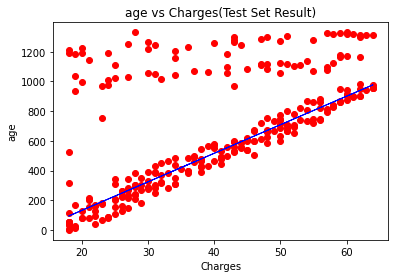

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue',linewidth=1)
plt.title('age vs Charges(Test Set Result)')
plt.xlabel('Charges')
plt.ylabel('age')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train) 


DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.33688004649546566

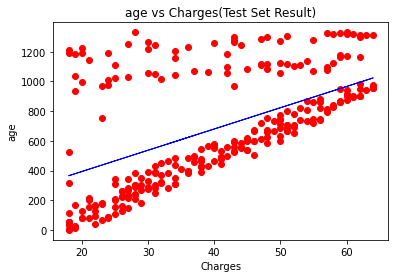

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue',linewidth=1)
plt.title('age vs Charges(Test Set Result)')
plt.xlabel('Charges')
plt.ylabel('age')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state = 0) # n estiamator is the number of decision trees
regressor.fit(X_train,y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.3310383254855498

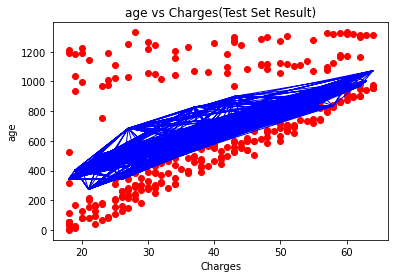

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue',linewidth=1)
plt.title('age vs Charges(Test Set Result)')
plt.xlabel('Charges')
plt.ylabel('age')
plt.show()

Conclusion:
Here Different typesof regression processesare done.R2 scores are checked for measuring the effeciency of the process. Random forest gave the best result for the data set